#### population covariance
$$ COV(x, y) = \frac{\displaystyle\sum_{i=1}^{N}(x_i - \mu_x)(y_i - \mu_y)}{N} $$

**$ N $** : population size

**$ \mu_x $** : population mean of $x$

**$ \mu_y $** : population mean of $y$



#### sample covariance
$$ COV(x, y) = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{(n - 1)} $$

**$ n $** : sample size

**$ \bar{x} $** : sample mean of $x$

**$ \bar{y} $** : sample mean of $y$

#### population standard deviation
$$ \sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{N}(x_i - \mu)^2}{N}} $$

**$ N $** : population size

**$ \mu $** : population mean 




#### sample standard deviation
$$ s = \sqrt{\frac{\displaystyle\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}} $$

**$ n $** : sample size

**$ \bar{x} $** : sample mean of $x$ 

#### Pearson correlation
$$ r = \frac{COV(x,y)}{\sigma_x\sigma_y} $$


#### Making schematic diagram for linear correlation

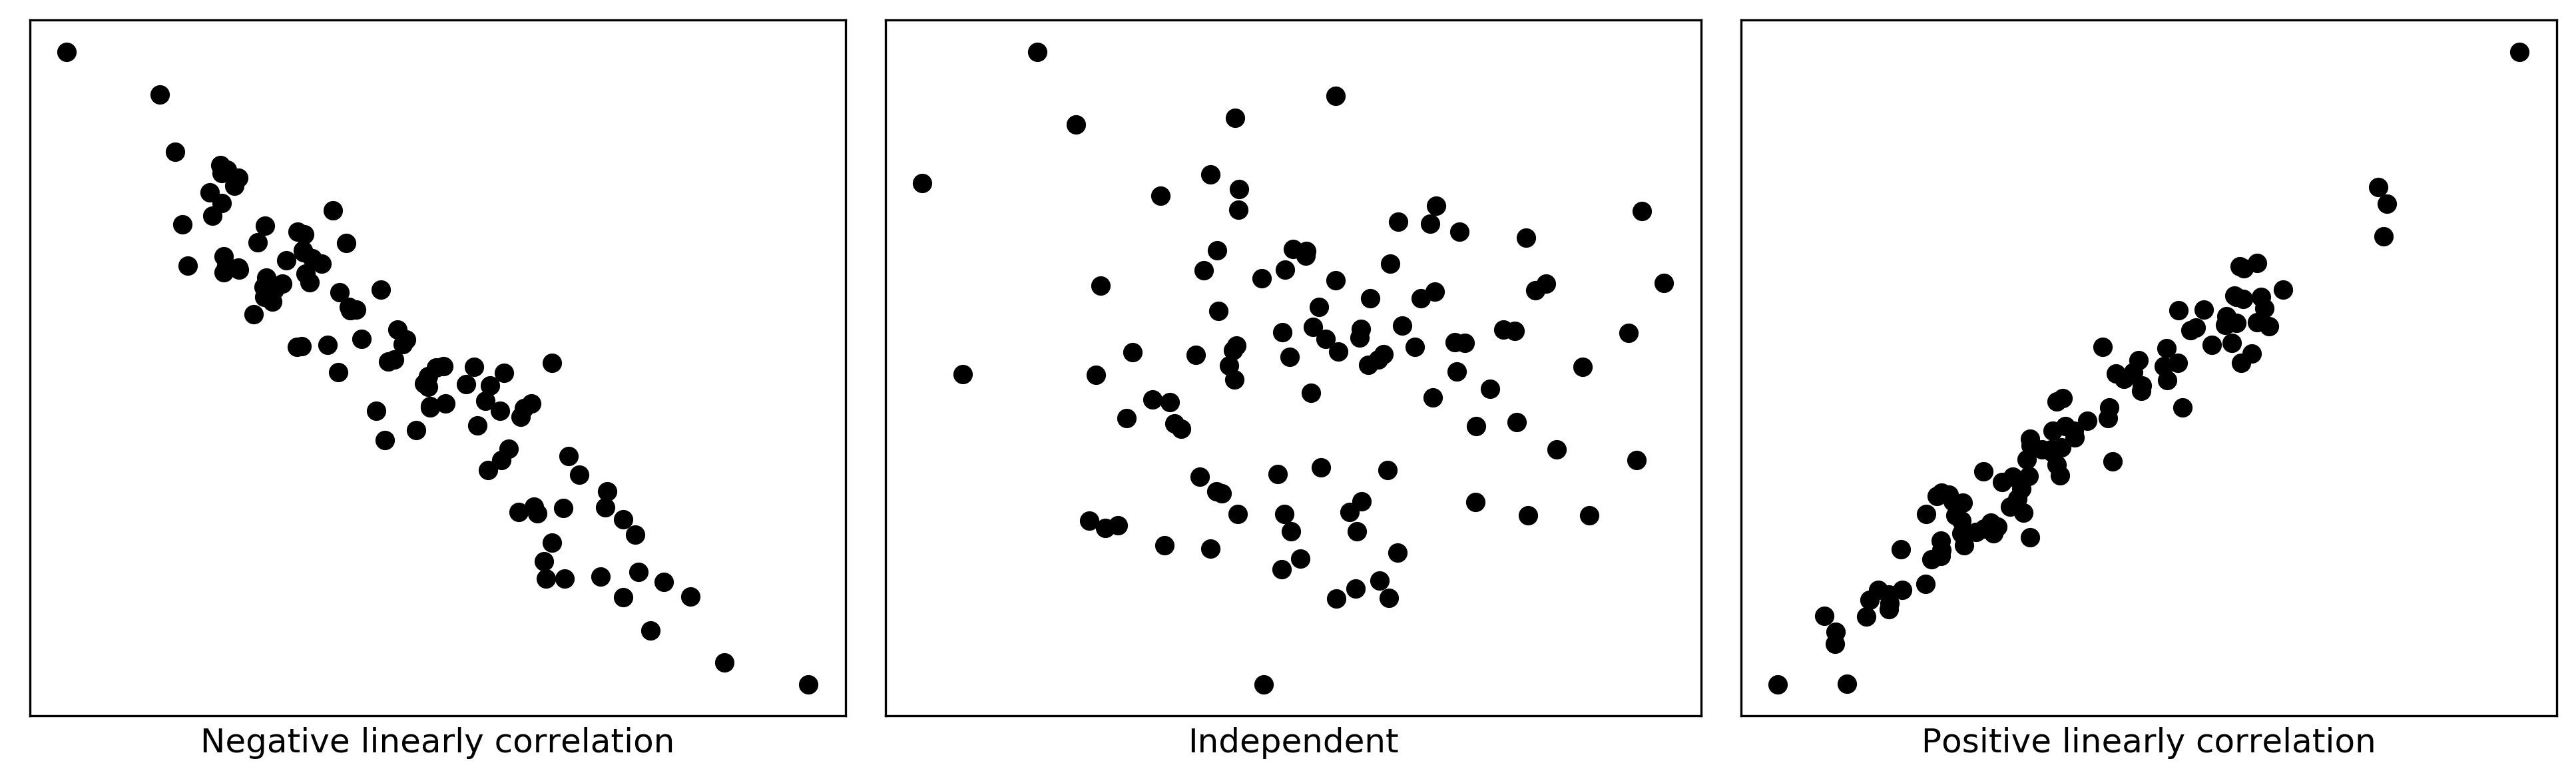

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.array([-0.51, 50])
yy = np.array([0.33, 50])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr1 = -.95        # correlation
corr2 = 0
corr3 = .95
covs1 = [[stds[0]**2          , stds[0]*stds[1]*corr1], 
        [stds[0]*stds[1]*corr1,           stds[1]**2]] 
m1 = np.random.multivariate_normal(means, covs1, 100).T

covs2 = [[stds[0]**2          , stds[0]*stds[1]*corr2], 
        [stds[0]*stds[1]*corr2,           stds[1]**2]] 
m2 = np.random.multivariate_normal(means, covs2, 100).T

covs3 = [[stds[0]**2          , stds[0]*stds[1]*corr3], 
        [stds[0]*stds[1]*corr3,           stds[1]**2]] 
m3 = np.random.multivariate_normal(means, covs3, 100).T

fig = plt.figure(figsize=(13,4), dpi=300)
axs = fig.subplots(nrows=1, ncols=3)

axs.flat[0].scatter(m1[0], m1[1], c='black')
axs.flat[0].set_xlabel('Negative linearly correlation', fontsize=12)
axs.flat[0].get_xaxis().set_ticks([])
axs.flat[0].get_yaxis().set_ticks([])

axs.flat[1].scatter(m2[0], m2[1], c='black')
axs.flat[1].set_xlabel('Independent', fontsize=12)
axs.flat[1].get_xaxis().set_ticks([])
axs.flat[1].get_yaxis().set_ticks([])

axs.flat[2].scatter(m3[0], m3[1], c='black')
axs.flat[2].set_xlabel('Positive linearly correlation', fontsize=12)
axs.flat[2].get_xaxis().set_ticks([])
axs.flat[2].get_yaxis().set_ticks([])

plt.tight_layout()

#### Test normality

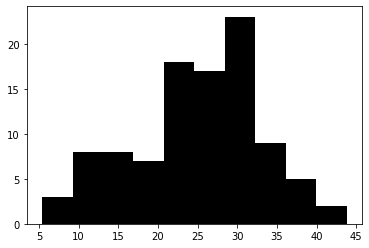

In [5]:
# Visual Normality Checks histogram plot
from matplotlib import pyplot

# histogram plot
pyplot.hist(m1[1], color='black')
pyplot.show()

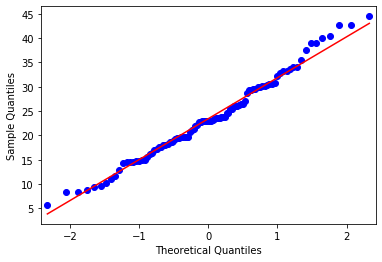

In [58]:
# The Q-Q plot, or quantile-quantile plot, is a graphical tool 
# to help us assess if a set of data plausibly came from some theoretical distribution
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(m1[0], line='s')
plt.show()

In [60]:
### Statistical Normality Tests Shapiro-Wilk Test
from scipy.stats import shapiro

# normality test
stat, p = shapiro(m1[0])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.984, p=0.258
Sample looks Gaussian (fail to reject H0)


In [61]:
# D’Agostino’s K^2 Test
from scipy.stats import normaltest

# normality test
stat, p = normaltest(m1[0])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.851, p=0.396
Sample looks Gaussian (fail to reject H0)


In [62]:
# Anderson-Darling Test
from scipy.stats import anderson

# normality test
result = anderson(m1[0])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.441
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


#### Illustrate monotonic relationship

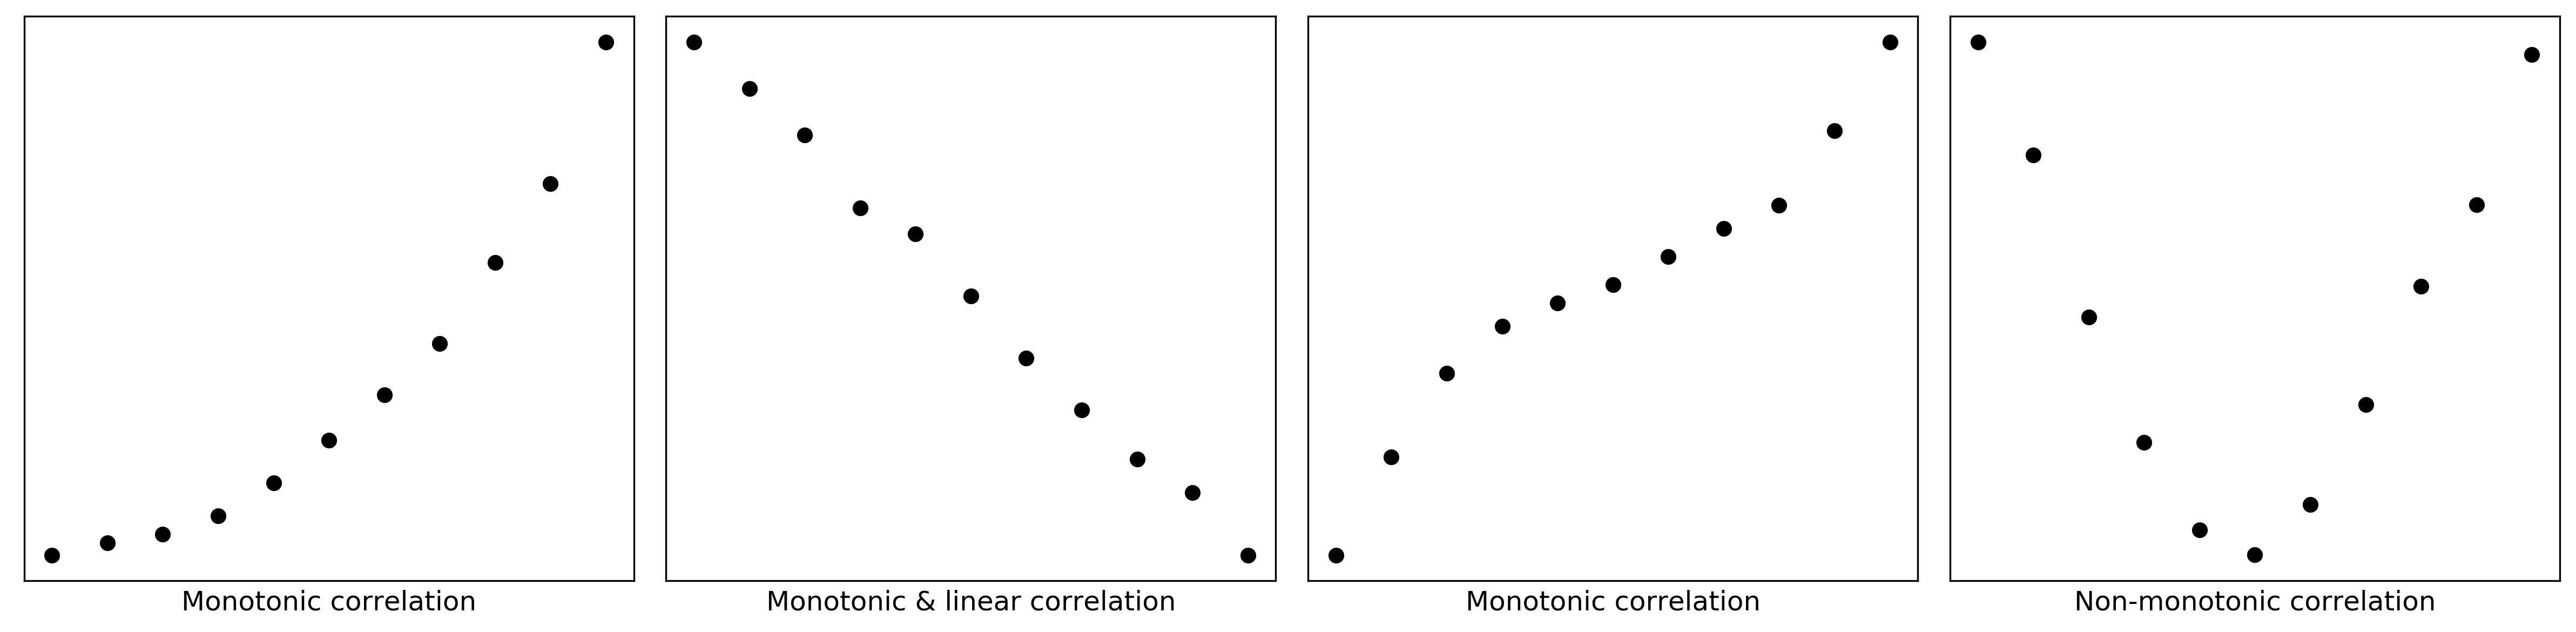

In [34]:
import numpy as np
import matplotlib.pyplot as plt

 
# Date for plot
x1 = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y1 = [-3.2, -2.8, -2.5, -1.9, -0.8, 0.6, 2.1, 3.8, 6.5, 9.1, 13.8]

x2 = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y2 = [5, 4.1, 3.2, 1.8, 1.3, 0.1, -1.1, -2.1, -3.05, -3.7, -4.9]

x3 = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y3 = [-5.2, -3.1, -1.3, -0.3, 0.2, 0.6, 1.2, 1.8, 2.3, 3.9, 5.8]

x4 = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y4 = [5, 4.1, 2.8, 1.8, 1.1, 0.9, 1.3, 2.1, 3.05, 3.7, 4.9]

fig = plt.figure(figsize=(16,4), dpi=300)
axs = fig.subplots(nrows=1, ncols=4)

axs.flat[0].scatter(x1, y1, c='black')
axs.flat[0].set_xlabel('Monotonic correlation', fontsize=12)
axs.flat[0].get_xaxis().set_ticks([])
axs.flat[0].get_yaxis().set_ticks([])

axs.flat[1].scatter(x2, y2, c='black')
axs.flat[1].set_xlabel('Monotonic & linear correlation', fontsize=12)
axs.flat[1].get_xaxis().set_ticks([])
axs.flat[1].get_yaxis().set_ticks([])

axs.flat[2].scatter(x3, y3, c='black')
axs.flat[2].set_xlabel('Monotonic correlation', fontsize=12)
axs.flat[2].get_xaxis().set_ticks([])
axs.flat[2].get_yaxis().set_ticks([])

axs.flat[3].scatter(x4, y4, c='black')
axs.flat[3].set_xlabel('Non-monotonic correlation', fontsize=12)
axs.flat[3].get_xaxis().set_ticks([])
axs.flat[3].get_yaxis().set_ticks([])

plt.tight_layout()


#### Spearman Rank Correlation full formula

$$ \rho = \frac{n\displaystyle\sum_{i=1}^{n}u_iv_i-\left(\displaystyle\sum_{i=1}^{n}u_i\right)\left(\displaystyle\sum_{i=1}^{n}v_i\right)}{\sqrt{\left[n\displaystyle\sum_{i=1}^{n}u_i^2-\left(\displaystyle\sum_{i=1}^{n}u_i\right)^2\right]\left[n\displaystyle\sum_{i=1}^{n}v_i^2-\left(\displaystyle\sum_{i=1}^{n}v_i\right)^2\right]}} $$

$u_i$: the rank of the *ith* observation in the first sample

$v_i$: the rank of the *ith* observation in the second sample

#### Spearman Rank Correlation without tied ranks

$$ \rho = 1 - \frac{6\displaystyle\sum_{i=1}^{n}d_i^2}{n(n^2-1)} $$ 


**$ n $** : sample size

**$ d_i $** : Difference between ranks for *ith* sample  

In [35]:
# Spearman rho Test
from scipy.stats import spearmanr

spearmanr([1,2,3,4,5],[5,6,7,8,7])

(0.8207826816681233, 0.0885870053135438)

In [38]:
import numpy as np

np.random.seed(1234321)
x2n=np.random.randn(100,2)
spearmanr(x2n)

#spearmanr(x2n[:,0], x2n[:,1])
#rho, pval = spearmanr(x2n,y2n)

SpearmanrResult(correlation=0.059969996999699966, pvalue=0.5533859080377359)

#### Concordant and discordant

Given two observations ($u_i$,$v_i$) and ($u_j$,$v_j$) in a bivariate array, then

$$\frac{v_j-v_i}{u_j-u_i}>0$$ two observations are concordant

$$\frac{v_j-v_i}{u_j-u_i}<0$$ two observations are discordant

$$\frac{v_j-v_i}{u_j-u_i}=0$$ two observations are considered as a tie

when $u_i$ = $u_j$, observations are not compared

$u_i$: the rank of the *ith* observation in the first sample

$v_i$: the rank of the *ith* observation in the second sample

#### Kendall's Tau


$$\tau_a=\frac{N_c−N_d}{N(N−1)/2}$$

$$\tau_b=\frac{N_c-N_d}{\sqrt{(N_c+N_d+T_x)(N_c+N_d+T_y)}}$$

where $N_c$ and $N_d$ denoting the number of concordant pairs and the number of discordant pairs, respectively, in the sample. $T_x$ denoting the number of pairs tied for the first response variable only and $T_y$ denoting the number of pairs tied for the second variable only. Kendall's $\tau_b$ is equal to Kendall's $\tau_a$ when there are no ties but is preferred to Kendall's tau-a when there are ties.

$r_s$

#### Point biserial r

To calculate $r_{pb}$, assume that the dichotomous variable Y has the two values 0 and 1. If we divide the data set into two groups, group 1 which received the value "1" on Y and group 2 which received the value "0" on Y, then the point-biserial correlation coefficient is calculated as follows:

$$r_{pb}=\frac{M_1-M_0}{s_n}\sqrt{\frac{n_1n_0}{n(n-1)}}$$

$M_1$ being the mean value on the continuous variable X for all data points in group 1, and $M_0$ the mean value on the continuous variable X for all data points in group 2. Further, $n_1$ is the number of data points in group 1, $n_0$ is the number of data points in group 2 and $n$ is the total sample size. 